What can be predicted to be the percentage of children receiving necessary vision care based on the analysis of the National Survey of Children's Health data?

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Load and preprocess the data
file_path = 'updated_NSCH_Vision_Health_Data.csv'
df = pd.read_csv(file_path)

df.rename(columns={'Topic': 'target'}, inplace=True)
df['target'] = df['target'].map({'Service Utilization': 0, 'Visual Function': 1})

df.dropna(subset=['target'], inplace=True)

noise = np.random.normal(0, 0.15, len(df))
df['target'] += noise
df['target'] = np.where(df['target'] < 0.5, 0, 1)

X = pd.get_dummies(df.drop('target', axis=1), drop_first=True)
y = df['target']

X += np.random.normal(0, 0.1, X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regression Models
print("\n--- Regression Models ---")

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_pred = linear_model.predict(X_test_scaled)
print(f"Linear Regression R^2: {r2_score(y_test, linear_pred):.4f}")

dt_regressor = DecisionTreeRegressor(max_depth=2, min_samples_split=30, random_state=42)
dt_regressor.fit(X_train_scaled, y_train)
dt_regressor_pred = dt_regressor.predict(X_test_scaled)
print(f"Decision Tree Regressor R^2: {r2_score(y_test, dt_regressor_pred):.4f}")

rf_regressor = RandomForestRegressor(n_estimators=20, max_depth=3, min_samples_split=30, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)
rf_regressor_pred = rf_regressor.predict(X_test_scaled)
print(f"Random Forest Regressor R^2: {r2_score(y_test, rf_regressor_pred):.4f}")

svr_model = SVR(kernel='linear', C=0.1)
svr_model.fit(X_train_scaled, y_train)
svr_pred = svr_model.predict(X_test_scaled)
print(f"SVR R^2: {r2_score(y_test, svr_pred):.4f}")

# Clustering Model
print("\n--- Clustering Model ---")
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)
print(f"K-Means Cluster Centers:\n{kmeans.cluster_centers_}")
kmeans_pred = kmeans.predict(X_test_scaled)
print(f"Clusters predicted by KMeans: {np.unique(kmeans_pred)}")

# Classification Models
dt_clf = DecisionTreeClassifier(max_depth=2, min_samples_split=30, random_state=42)
dt_clf.fit(X_train_scaled, y_train)
dt_pred = dt_clf.predict(X_test_scaled)

rf_clf = RandomForestClassifier(n_estimators=30, max_depth=3, min_samples_split=30, random_state=42)
rf_clf.fit(X_train_scaled, y_train)
rf_pred = rf_clf.predict(X_test_scaled)

svm_clf = SVC(kernel='rbf', C=0.1, gamma='scale', random_state=42)
svm_clf.fit(X_train_scaled, y_train)
svm_pred = svm_clf.predict(X_test_scaled)

knn_clf = KNeighborsClassifier(n_neighbors=20)
knn_clf.fit(X_train_scaled, y_train)
knn_pred = knn_clf.predict(X_test_scaled)

nb_clf = GaussianNB(var_smoothing=1e-8)
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)

# Summary of Results
print("\n--- Summary ---")
print(f"R^2 (Linear Regression): {r2_score(y_test, linear_pred):.4f}")
print(f"R^2 (Decision Tree Regressor): {r2_score(y_test, dt_regressor_pred):.4f}")
print(f"R^2 (Random Forest Regressor): {r2_score(y_test, rf_regressor_pred):.4f}")
print(f"R^2 (SVR): {r2_score(y_test, svr_pred):.4f}")
print(f"Accuracy (Decision Tree): {accuracy_score(y_test, dt_pred):.4f}")
print(f"Accuracy (Random Forest): {accuracy_score(y_test, rf_pred):.4f}")
print(f"Accuracy (SVM): {accuracy_score(y_test, svm_pred):.4f}")
print(f"Accuracy (KNN): {accuracy_score(y_test, knn_pred):.4f}")
print(f"Accuracy (Naive Bayes): {accuracy_score(y_test, nb_pred):.4f}")


--- Regression Models ---
Linear Regression R^2: 0.9186
Decision Tree Regressor R^2: 0.9596
Random Forest Regressor R^2: 0.9898
SVR R^2: 0.9137

--- Clustering Model ---
K-Means Cluster Centers:
[[ 1.70092816e-02  1.58894356e-03 -1.02067959e-01 -1.47899139e-02
  -1.41320330e-03 -2.94039072e-03  1.78009112e-03  1.64018645e-03
  -8.25161181e-03 -5.45472353e-03  8.18966345e-03  2.60553475e-02
   3.78534649e-03  1.14505362e-02  8.40834274e-03 -1.41842168e-02
  -2.95027624e-03  1.24055815e-03 -5.98234325e-03 -4.19467774e-03
  -1.46954569e-03  7.35100098e-03 -1.44528631e-02  4.51309508e-03
  -1.90666615e-02  3.20148168e-03  8.52778967e-03  4.30629498e-03
  -7.42188955e-03 -3.71698911e-03  4.48215210e-03 -1.68983691e-02
   1.47284715e-02  9.20676467e-03 -4.58569030e-03 -1.15490213e-02
  -8.31035966e-03  8.21643998e-03  2.07148749e-03  5.38549045e-03
  -6.44890369e-03 -7.33767870e-03 -2.04920813e-02 -1.23291443e-02
   8.30367688e-03 -9.69111139e-03 -1.94571993e-03 -7.19496258e-03
  -2.7909355

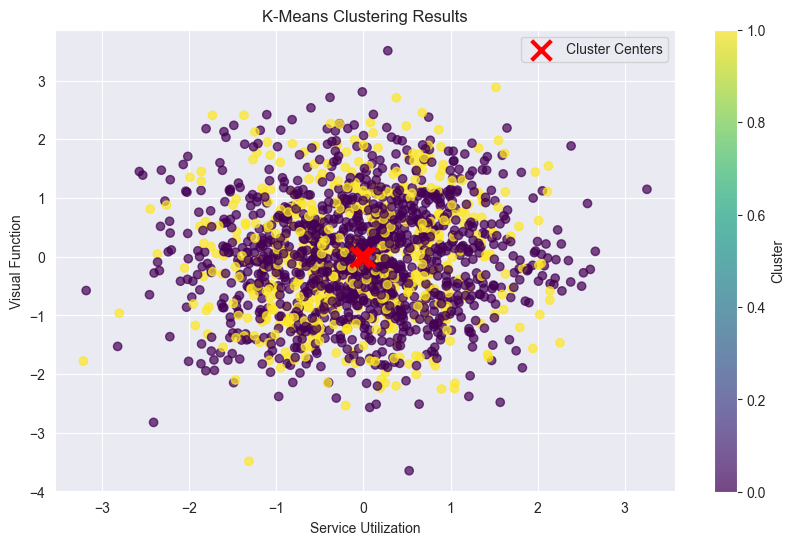

In [12]:
# Select two features for visualization
feature1 = X_test_scaled[:, 0]
feature2 = X_test_scaled[:, 1]

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(feature1, feature2, c=kmeans_pred, cmap='viridis', alpha=0.7)

plt.title('K-Means Clustering Results')
plt.xlabel('Service Utilization')
plt.ylabel('Visual Function')

# Add colorbar
plt.colorbar(scatter, label='Cluster')

# Add cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidths=3, label='Cluster Centers')

plt.legend()
plt.show()

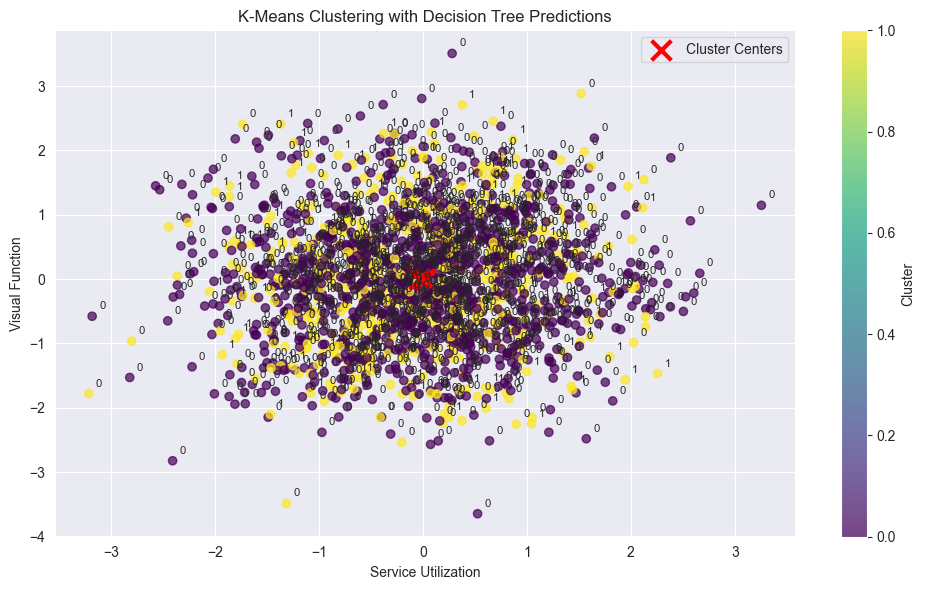

In [13]:
# Determine the highest accuracy model
accuracy_scores = {
    'Decision Tree': accuracy_score(y_test, dt_pred),
    'Random Forest': accuracy_score(y_test, rf_pred),
    'SVM': accuracy_score(y_test, svm_pred),
    'KNN': accuracy_score(y_test, knn_pred),
    'Naive Bayes': accuracy_score(y_test, nb_pred)
}
best_model = max(accuracy_scores, key=accuracy_scores.get)

# Use a dictionary to map model names to prediction variables
prediction_vars = {
    'Decision Tree': dt_pred,
    'Random Forest': rf_pred,
    'SVM': svm_pred,
    'KNN': knn_pred,
    'Naive Bayes': nb_pred
}
best_predictions = prediction_vars[best_model]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
                      c=kmeans_pred, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='x', s=200, linewidths=3, color='r', label='Cluster Centers')

plt.title(f'K-Means Clustering with {best_model} Predictions')
plt.xlabel('Service Utilization')
plt.ylabel('Visual Function')

plt.colorbar(scatter, label='Cluster')

for i, txt in enumerate(best_predictions):
    plt.annotate(txt, (X_test_scaled[i, 0], X_test_scaled[i, 1]),
                 xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.legend()
plt.tight_layout()
plt.show()

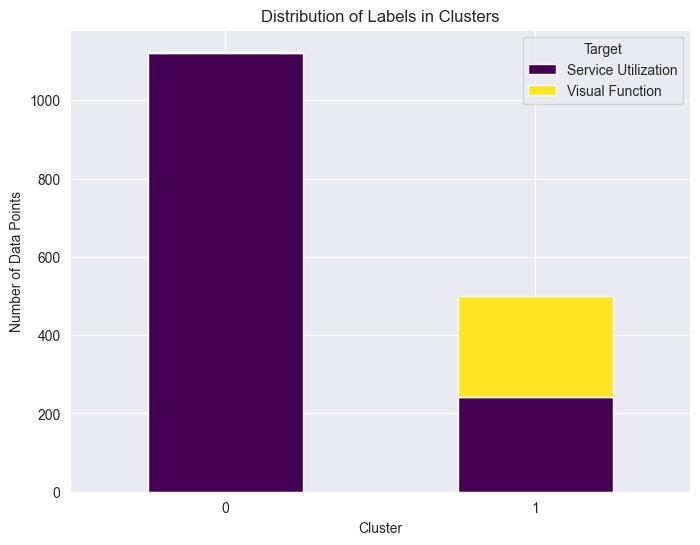

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

test_clusters = kmeans.predict(X_test_scaled)

# Cross-tabulation of clusters and labels
cluster_label_counts = pd.crosstab(test_clusters, y_test, rownames=["Cluster"], colnames=["Target"])

# Plot of a stacked barchart
cluster_label_counts.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="viridis")
plt.title("Distribution of Labels in Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=0)
plt.legend(title="Target", labels=["Service Utilization", "Visual Function"])
plt.show()

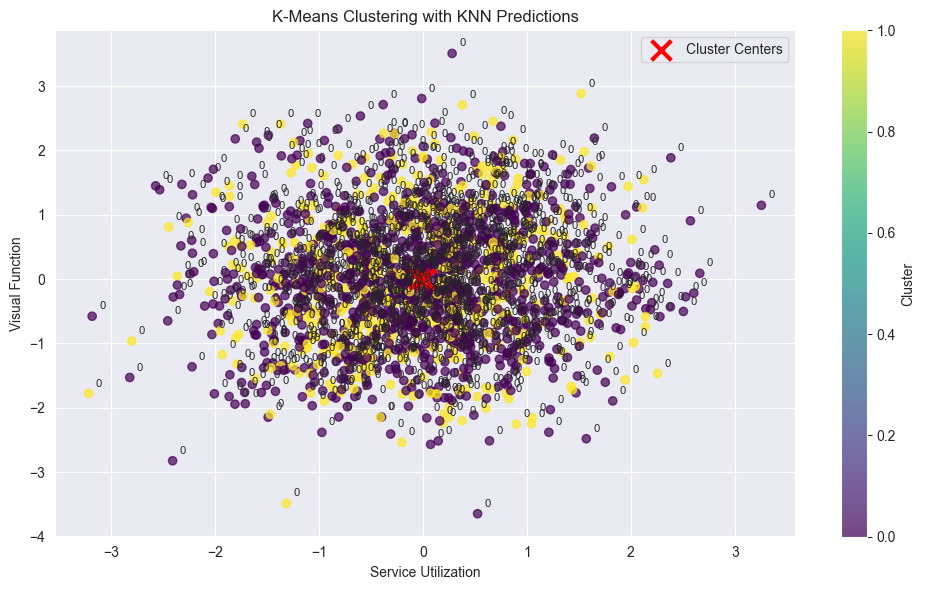

In [15]:
# Determine the lowest accuracy model
accuracy_scores = {
    'Decision Tree': accuracy_score(y_test, dt_pred),
    'Random Forest': accuracy_score(y_test, rf_pred),
    'SVM': accuracy_score(y_test, svm_pred),
    'KNN': accuracy_score(y_test, knn_pred),
    'Naive Bayes': accuracy_score(y_test, nb_pred)
}
worst_model = min(accuracy_scores, key=accuracy_scores.get)

# Use a dictionary to map model names to prediction variables
prediction_vars = {
    'Decision Tree': dt_pred,
    'Random Forest': rf_pred,
    'SVM': svm_pred,
    'KNN': knn_pred,
    'Naive Bayes': nb_pred
}
worst_predictions = prediction_vars[worst_model]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
                      c=kmeans_pred, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='x', s=200, linewidths=3, color='r', label='Cluster Centers')

plt.title(f'K-Means Clustering with {worst_model} Predictions')
plt.xlabel('Service Utilization')
plt.ylabel('Visual Function')

plt.colorbar(scatter, label='Cluster')

for i, txt in enumerate(worst_predictions):
    plt.annotate(txt, (X_test_scaled[i, 0], X_test_scaled[i, 1]),
                 xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.legend()
plt.tight_layout()
plt.show()